<div style="text-align: center;">
  <div style="display: inline-block; min-width: 60%; font-weight: bold; font-size: 24px; color: white; background-color: blue; padding: 15px 20px; border: 2px solid white; border-radius: 8px;">
    Documents Pages Parsing with Marker
  </div>
</div>


In this notebook, I'm testing Marker for document parsing to see how it performs. \
GitHub: https://github.com/datalab-to/marker

- Based on the documentation, this solution demonstrates a faster average processing time compared to Docling, Mathpix, and LlamaParse. In terms of performance (LLM score), it also delivers higher quality results, outperforming the other mentioned solutions.

# **1. Install Libraries**

In [1]:
%%capture
! pip install marker-pdf[full]
! pip install pdf2image
! apt-get update && apt-get install -y poppler-utils
! pip uninstall torch torchvision torchaudio -y
! pip install torch torchvision torchaudio

# **2. Import Libraries**

In [2]:
import logging
import time
from pathlib import Path
import pandas as pd
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
from PIL import Image
import os

import PIL.Image

from marker.converters.pdf import PdfConverter
from marker.models import create_model_dict
from marker.output import text_from_rendered

2025-06-23 14:49:27.848880: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750690168.062773      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750690168.120327      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
import logging
import time
from pathlib import Path
import pandas as pd
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
from PIL import Image
import os
import re

from IPython.display import display, HTML
import base64
import markdown
import markdown2

import io
from io import BytesIO, StringIO

import warnings
import sys
import contextlib

# **3. Parsing Documents Using Marker**

In [4]:
def display_file(file_path):
    """
    Display a PDF file or an image file.

    Args:
        file_path (str): Path to the PDF or image file.
    """
    file_extension = os.path.splitext(file_path)[1].lower()
    
    if file_extension == '.pdf':
        images = convert_from_path(file_path)
        for i, image in enumerate(images):
            plt.figure(figsize=(16, 12))
            plt.imshow(image)
            plt.axis('off')
            plt.show()
    elif file_extension in ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']:
        image = Image.open(file_path)
        plt.figure(figsize=(16, 12))
        plt.imshow(image)
        plt.axis('off')
        plt.show()
    else:
        raise ValueError("Unsupported file type. Please provide a PDF or image file.")

In [5]:
def parse_doc_with_marker(file_path):
    converter = PdfConverter(
        artifact_dict=create_model_dict(),
    )
    rendered = converter(file_path)
    text, _, images = text_from_rendered(rendered)
    print(text)

## **Example n°1**

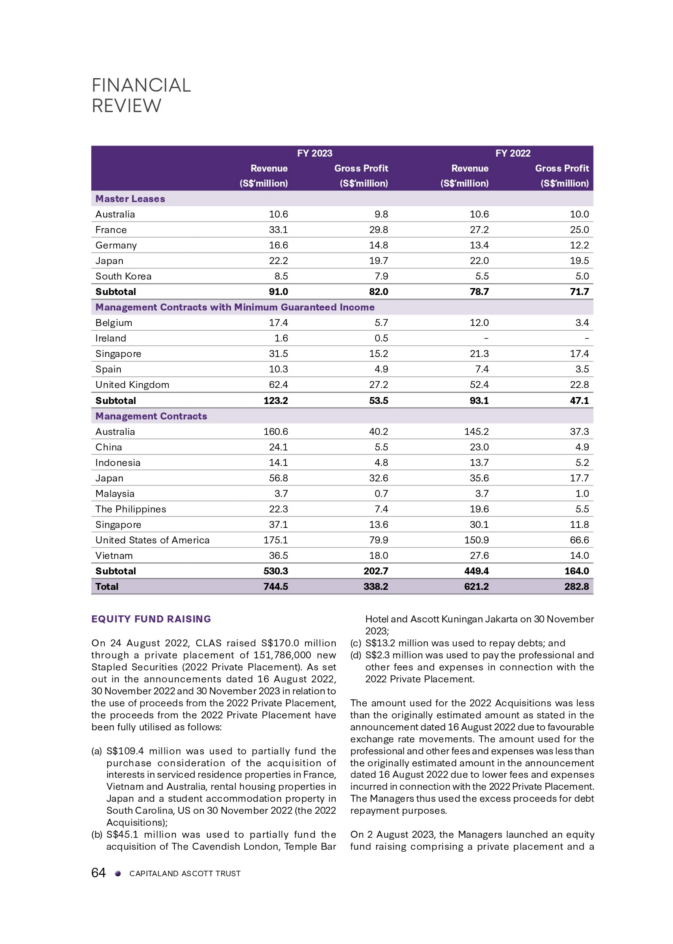

Recognizing tables: 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

## **FINANCIAL RFVIFW**

|                                                            | FY 2023        |                     | FY 2022        |                     |
|------------------------------------------------------------|----------------|---------------------|----------------|---------------------|
|                                                            | <b>Revenue</b> | <b>Gross Profit</b> | <b>Revenue</b> | <b>Gross Profit</b> |
|                                                            | (S\$'million)  | (S\$'million)       | (S\$'million)  | (S\$'million)       |
| <b>Master Leases</b>                                       |                |                     |                |                     |
| Australia                                                  | 10.6           | 9.8                 | 10.6           | 10.0                |
| France                                                     | 33.1           | 29.8                | 27.2           | 25.0      

In [6]:
display_file("/kaggle/input/pdf-files-pages/CLAS-FY2023-AR_page-0066.pdf")
parse_doc_with_marker("/kaggle/input/pdf-files-pages/CLAS-FY2023-AR_page-0066.pdf")

## **Example n°2**

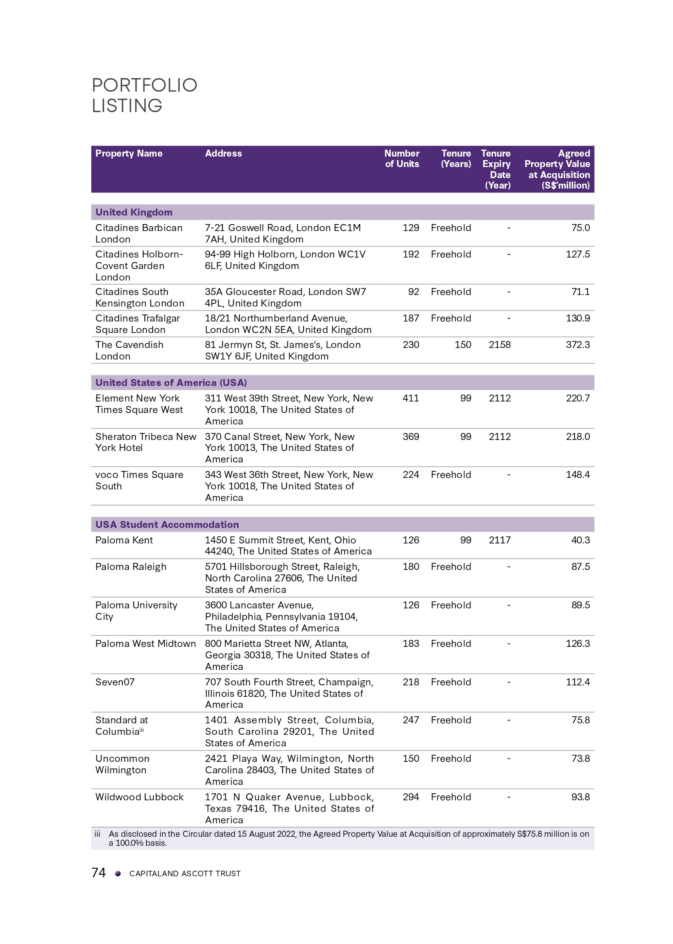

Recognizing tables: 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

## PORTFOLIO<br>LISTING

| <b>Property Name</b>                          | <b>Address</b>                                                                              | <b>Number</b><br>of Units | <b>Tenure</b><br>(Years) | <b>Tenure</b><br><b>Expiry</b><br>Date<br>(Year) | Agreed<br><b>Property Value</b><br>at Acquisition<br>(S\$'million) |
|-----------------------------------------------|---------------------------------------------------------------------------------------------|---------------------------|--------------------------|--------------------------------------------------|--------------------------------------------------------------------|
| <b>United Kingdom</b>                         |                                                                                             |                           |                          |                                                  |                                                                    |
| Citadines Barbic

In [7]:
display_file("/kaggle/input/pdf-files-pages/CLAS-FY2023-AR_page-0076.pdf")
parse_doc_with_marker("/kaggle/input/pdf-files-pages/CLAS-FY2023-AR_page-0076.pdf")

## **Example n°3**

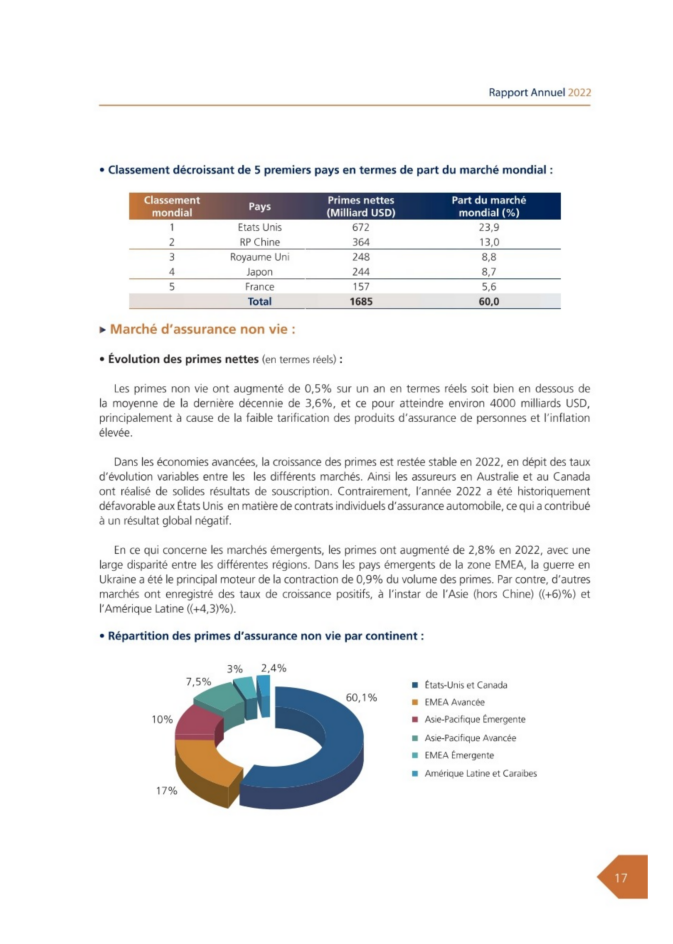

Recognizing tables: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

| <b>Classement</b><br>mondial | Pays         | <b>Primes nettes</b><br>(Milliard USD) | Part du marché<br>mondial $(\%)$ |
|------------------------------|--------------|----------------------------------------|----------------------------------|
|                              | Etats Unis   | 672                                    | 23,9                             |
|                              | RP Chine     | 364                                    | 13,0                             |
| 3                            | Royaume Uni  | 248                                    | 8,8                              |
| $\overline{4}$               | Japon        | 244                                    | 8,7                              |
| 5                            | France       | 157                                    | 5,6                              |
|                              | <b>Total</b> | 1685                                   | 60,0                             |

## . Cl

In [8]:
display_file("/kaggle/input/pdf-files-pages/doc2.pdf")
parse_doc_with_marker("/kaggle/input/pdf-files-pages/doc2.pdf")

## **Example n°4**

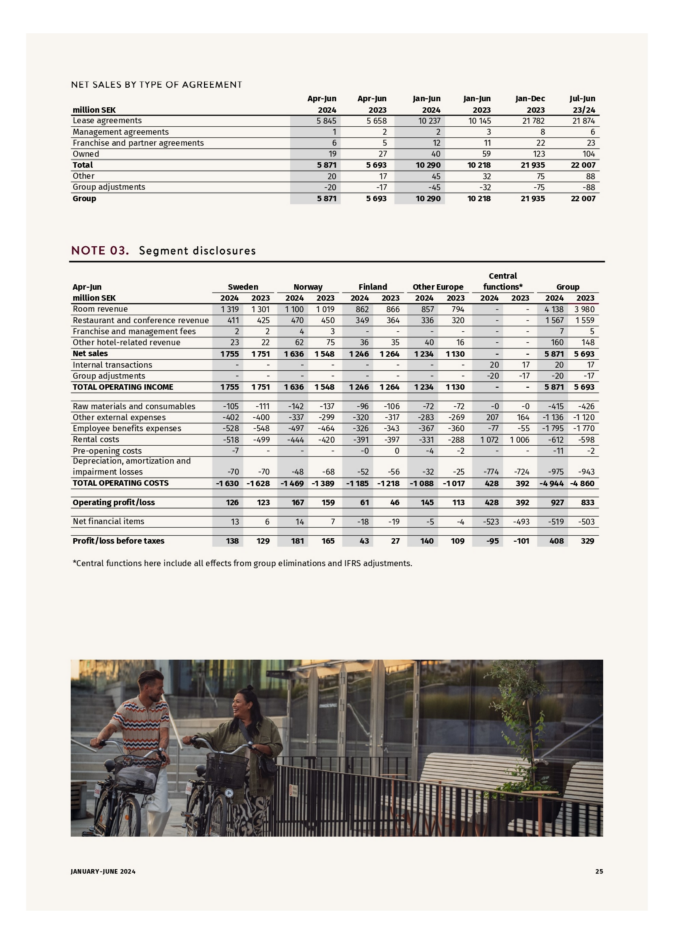

Recognizing tables: 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

## NET SALES BY TYPE OF AGREEMENT

|                                  | Apr-Jun | Apr-Jun | Jan-Jun | Jan-Jun | Jan-Dec | Jul-Jun |
|----------------------------------|---------|---------|---------|---------|---------|---------|
| million SEK                      | 2024    | 2023    | 2024    | 2023    | 2023    | 23/24   |
| Lease agreements                 | 5845    | 5658    | 10 237  | 10 145  | 21 782  | 21 874  |
| Management agreements            |         |         |         |         | 8       | 6       |
| Franchise and partner agreements |         | 5       | 12      | 11      | 22      | 23      |
| Owned                            | 19      | 27      | 40      | 59      | 123     | 104     |
| Total                            | 5871    | 5693    | 10 290  | 10 218  | 21935   | 22 007  |
| Other                            | 20      | 17      | 45      | 32      | 75      | 88      |
| Group adjustments                | $-20$   | $-17$   | $-45$   | $-32$   | $-75$   | $-88$

In [9]:
display_file("/kaggle/input/pdf-files-pages/the-full-report-pdf_page-0026.pdf")
parse_doc_with_marker("/kaggle/input/pdf-files-pages/the-full-report-pdf_page-0026.pdf")

## **Example n°5**

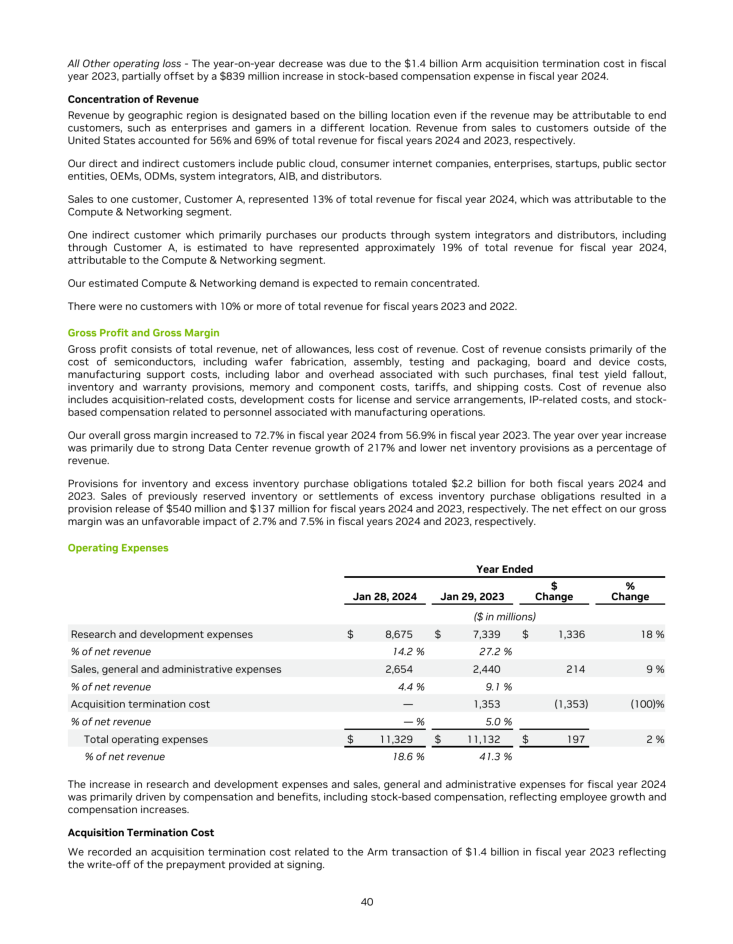

Running OCR Error Detection: 100%|██████████| 1/1 [00:00<00:00, 110.47it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Recognizing tables: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

*All Other operating loss* - The year-on-year decrease was due to the \$1.4 billion Arm acquisition termination cost in fiscal year 2023, partially offset by a \$839 million increase in stock-based compensation expense in fiscal year 2024.

## **Concentration of Revenue**

Revenue by geographic region is designated based on the billing location even if the revenue may be attributable to end customers, such as enterprises and gamers in a different location. Revenue from sales to customers outside of the United States accounted for 56% and 69% of total revenue for fiscal years 2024 and 2023, respectively.

Our direct and indirect customers include public cloud, consumer internet companies, enterprises, startups, public sector entities, OEMs, ODMs, system integrators, AIB, and distributors.

Sales to one customer, Customer A, represented 13% of total revenue for fiscal year 2024, which was attributable to the Compute & Networking segment.

One indirect customer which primarily purchases o

In [10]:
display_file("/kaggle/input/nvidia-annual-report/NVIDIA_Report_Removed_Pages-1-16-10.pdf")
parse_doc_with_marker("/kaggle/input/nvidia-annual-report/NVIDIA_Report_Removed_Pages-1-16-10.pdf")

## **Example n°6**

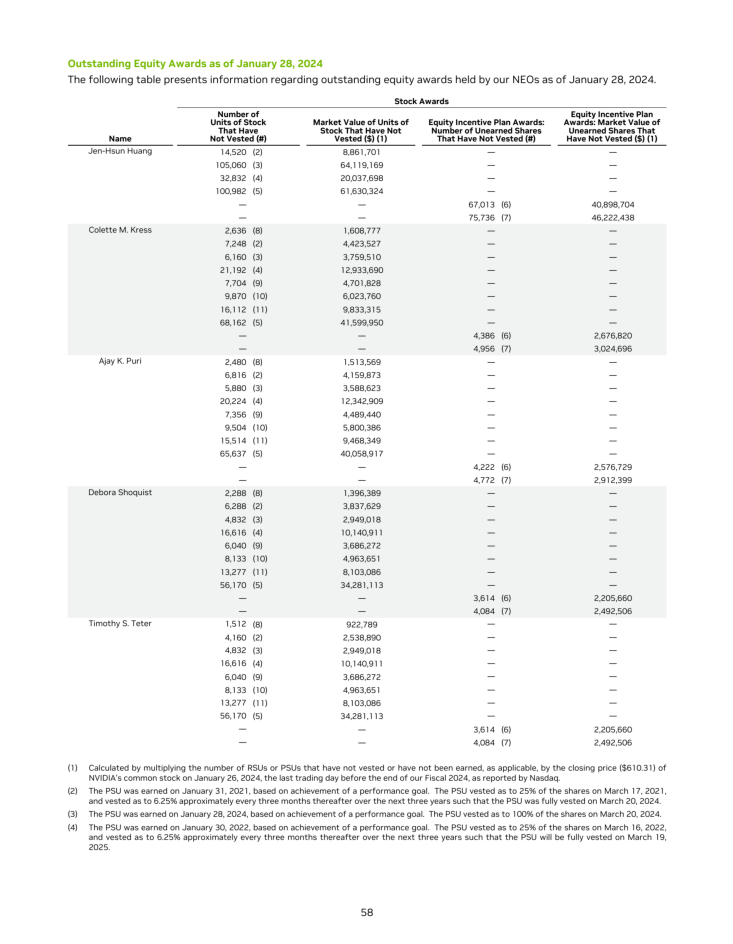

Running OCR Error Detection: 100%|██████████| 1/1 [00:00<00:00, 118.20it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Recognizing tables: 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

## **Outstanding Equity Awards as of January 28, 2024**

The following table presents information regarding outstanding equity awards held by our NEOs as of January 28, 2024.

|                  | Stock Awards                                               |                                                                    |                                                                                        |                                                                                                      |
|------------------|------------------------------------------------------------|--------------------------------------------------------------------|----------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------|
| Name             | Number of<br>Units of Stock<br>That Have<br>Not Vested (#) | Market Value of Units of<br>Stock That Have Not<br>Veste

In [11]:
display_file("/kaggle/input/nvidia-annual-report/NVIDIA_Report_Removed_Pages-1-16-3.pdf")
parse_doc_with_marker("/kaggle/input/nvidia-annual-report/NVIDIA_Report_Removed_Pages-1-16-3.pdf")

## **Example n°7**

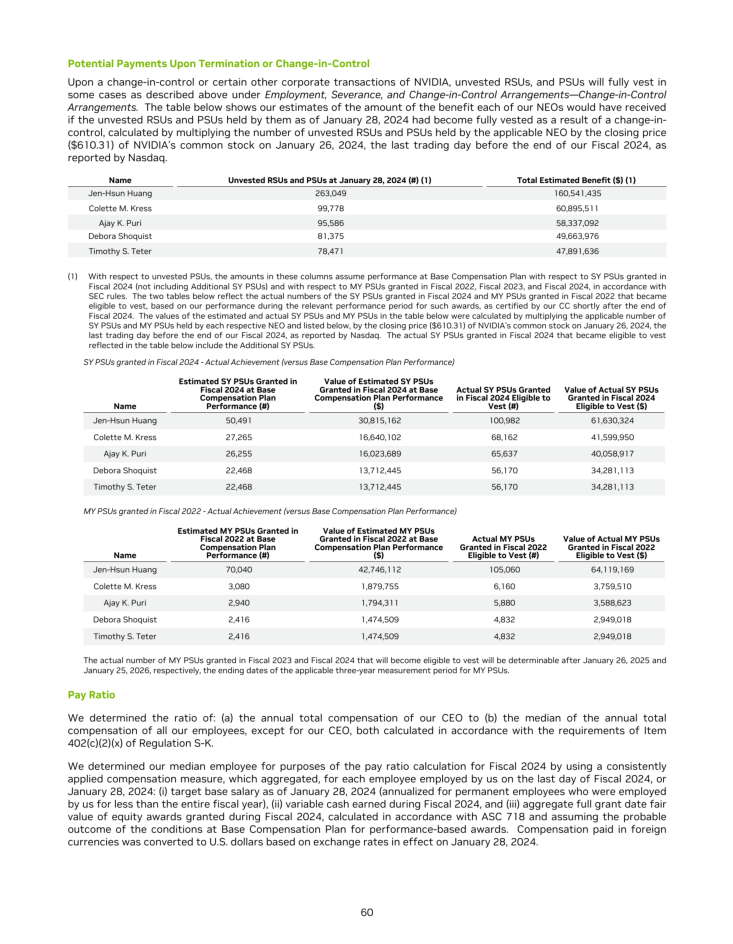

Running OCR Error Detection: 100%|██████████| 1/1 [00:00<00:00, 112.52it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Recognizing tables: 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

## **Potential Payments Upon Termination or Change-in-Control**

Upon a change-in-control or certain other corporate transactions of NVIDIA, unvested RSUs, and PSUs will fully vest in some cases as described above under *Employment, Severance, and Change-in-Control Arrangements—Change-in-Control Arrangements.* The table below shows our estimates of the amount of the benefit each of our NEOs would have received if the unvested RSUs and PSUs held by them as of January 28, 2024 had become fully vested as a result of a change-incontrol, calculated by multiplying the number of unvested RSUs and PSUs held by the applicable NEO by the closing price (\$610.31) of NVIDIA's common stock on January 26, 2024, the last trading day before the end of our Fiscal 2024, as reported by Nasdaq.

| Name             | Unvested RSUs and PSUs at January 28, 2024 (#) (1) | Total Estimated Benefit (\$) (1) |
|------------------|----------------------------------------------------|-------------------------------

In [12]:
display_file("/kaggle/input/nvidia-annual-report/NVIDIA_Report_Removed_Pages-1-16-5.pdf")
parse_doc_with_marker("/kaggle/input/nvidia-annual-report/NVIDIA_Report_Removed_Pages-1-16-5.pdf")

## **Example n°8**

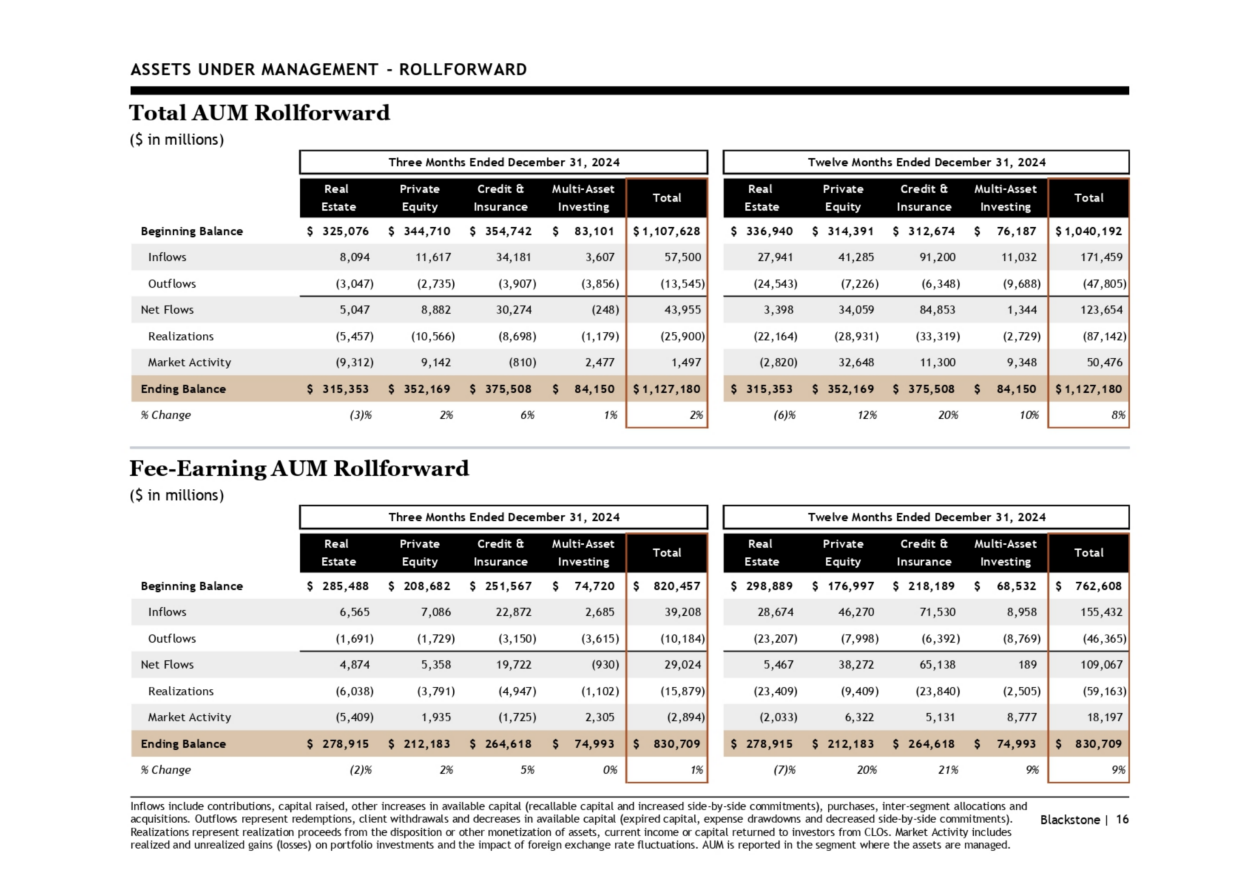

Recognizing tables: 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

## **Total AUM Rollforward**

(\$ in millions)

|                          | Three Months Ended December 31, 2024 |                   |                       |                          |             |  | Twelve Months Ended December 31, 2024 |                   |                       |                          |             |  |  |
|--------------------------|--------------------------------------|-------------------|-----------------------|--------------------------|-------------|--|---------------------------------------|-------------------|-----------------------|--------------------------|-------------|--|--|
|                          | Real<br>Estate                       | Private<br>Equity | Credit &<br>Insurance | Multi-Asset<br>Investing | Total       |  | Real<br>Estate                        | Private<br>Equity | Credit &<br>Insurance | Multi-Asset<br>Investing | Total       |  |  |
| <b>Beginning Balance</b> | \$325,076                            | 344,710           | 354

In [13]:
display_file("/kaggle/input/pdf-files-pages/Blackstone4Q24EarningsPressRelease_page-0020.pdf")
parse_doc_with_marker("/kaggle/input/pdf-files-pages/Blackstone4Q24EarningsPressRelease_page-0020.pdf")

## **Example n°9**

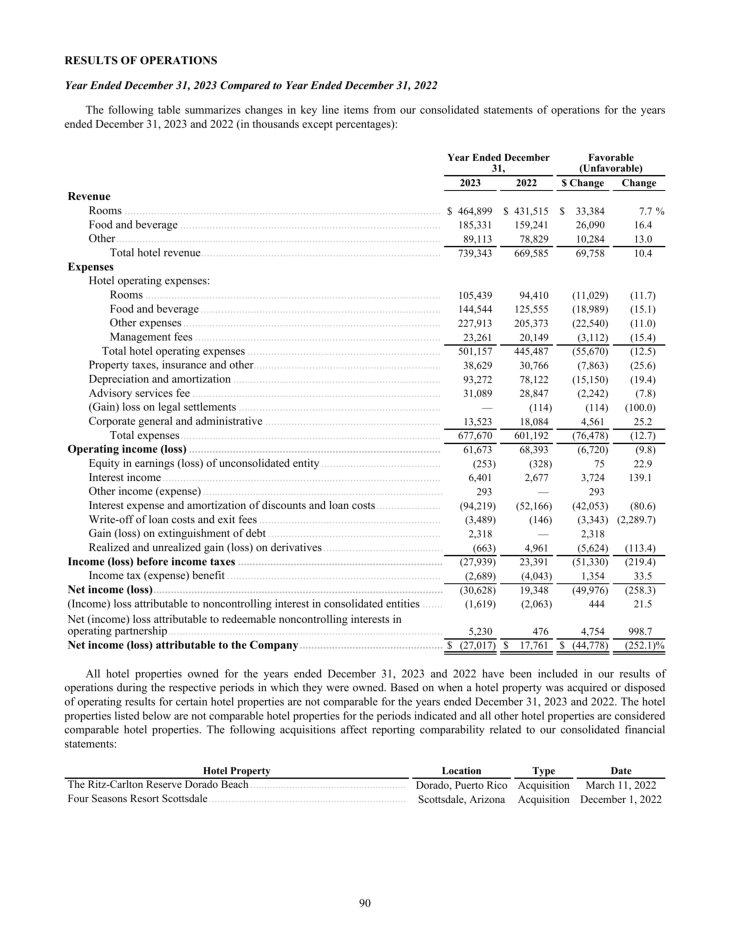

Running OCR Error Detection: 100%|██████████| 1/1 [00:00<00:00, 121.84it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Recognizing tables: 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

## **RESULTS OF OPERATIONS**

## *Year Ended December 31, 2023 Compared to Year Ended December 31, 2022*

The following table summarizes changes in key line items from our consolidated statements of operations for the years ended December 31, 2023 and 2022 (in thousands except percentages):

|                                                                                | Year Ended December<br>31, |            | Favorable<br>(Unfavorable)<br>% |                   |
|--------------------------------------------------------------------------------|----------------------------|------------|---------------------------------|-------------------|
|                                                                                | 2023                       | 2022       | \$ Change                       | Change            |
| Revenue                                                                        |                            |            |                                 |            

In [14]:
display_file("/kaggle/input/pdf-files-pages/2023-annual-report-96.pdf")
parse_doc_with_marker("/kaggle/input/pdf-files-pages/2023-annual-report-96.pdf")